In [22]:
import os
import json
import time
import random
import numpy as np
from datetime import datetime, timedelta
from osgeo import gdal
from matplotlib import pyplot as plt

In [23]:
DATA_ROOT_DIR = "/Volumes/X/Data/fusion-s1-s2/"

In [24]:
CROP_SIZE = 1024
INPUT_IMAGE_SIZE = 10980
length = range(0, INPUT_IMAGE_SIZE - CROP_SIZE, CROP_SIZE)
ALL_XY_COORDINATES = [(x, y) for x in length for y in length]

In [25]:
S2_ROOT_PATH = f"{DATA_ROOT_DIR}s2/sre-10m/"
S1_ROOT_PATH = f"{DATA_ROOT_DIR}s1db/32VNH/threeband/044/"

# s2_bands = ["B02","B03","B04","B05","B06","B07","B08","B11","B12","B8A"]
s2_bands = ["B02"]

In [35]:
for s2 in os.listdir(S2_ROOT_PATH)[:1]:
    for band in s2_bands:
        # try:
        image_path = f"{S2_ROOT_PATH}{s2}/{s2}_{band}.tif"
        image = gdal.Open(image_path)
        print(f"Processing {image_path}")

        width = image.RasterXSize
        height = image.RasterYSize

        gt = image.GetGeoTransform()

        min_x = int(gt[0])
        min_y = int(gt[3])
        max_x = int(gt[0] + width*gt[1])
        max_y = int(gt[3] + height*gt[5])

        x_length = range(min_x, max_x - CROP_SIZE, CROP_SIZE*10)
        y_length = range(min_y, max_y + CROP_SIZE, -CROP_SIZE*10)

        ALL_XY_COORDINATES = [(x, y) for x in x_length for y in y_length]
        print(ALL_XY_COORDINATES)

        for idx, (x, y) in enumerate(ALL_XY_COORDINATES):
            vrt_options = gdal.BuildVRTOptions(resolution="highest", outputBounds=(x, y, x + CROP_SIZE * 10, y + CROP_SIZE * 10))
            gdal.BuildVRT(f"data/cropped/{s2}_{band}_{idx}_{x}_{y}_{CROP_SIZE}.tif", [f"{S2_ROOT_PATH}/{s2}/{s2}_{band}.tif"], options=vrt_options)
            

        # except Exception as e:
        #     print(f"Path {S2_ROOT_PATH}/{s2}/{s2}_{band}.tif doesn't exist")
        #     print(f"ERROR: {e}")

Processing /Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B02.tif
[(499980, 6300000), (499980, 6289760), (499980, 6279520), (499980, 6269280), (499980, 6259040), (499980, 6248800), (499980, 6238560), (499980, 6228320), (499980, 6218080), (499980, 6207840), (499980, 6197600), (510220, 6300000), (510220, 6289760), (510220, 6279520), (510220, 6269280), (510220, 6259040), (510220, 6248800), (510220, 6238560), (510220, 6228320), (510220, 6218080), (510220, 6207840), (510220, 6197600), (520460, 6300000), (520460, 6289760), (520460, 6279520), (520460, 6269280), (520460, 6259040), (520460, 6248800), (520460, 6238560), (520460, 6228320), (520460, 6218080), (520460, 6207840), (520460, 6197600), (530700, 6300000), (530700, 6289760), (530700, 6279520), (530700, 6269280), (530700, 6259040), (530700, 6248800), (530700, 6238560), (530700, 6228320), (530700, 6218080), (530700, 6207840), (530700, 6197600), (540940, 6300000), (540940, 6289760), (540940, 6279520), (540940, 62

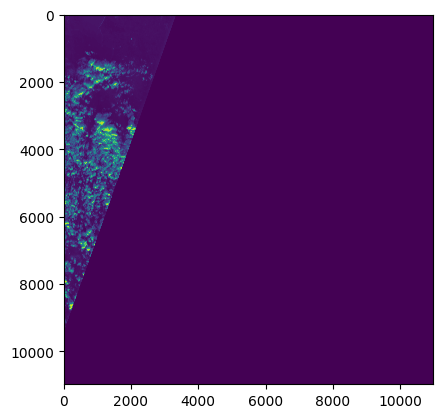

In [46]:
ori = gdal.Open(f"{S2_ROOT_PATH}S2_32VNH_20190101/S2_32VNH_20190101_B02.tif")
plt.imshow(ori.ReadAsArray())
plt.show()

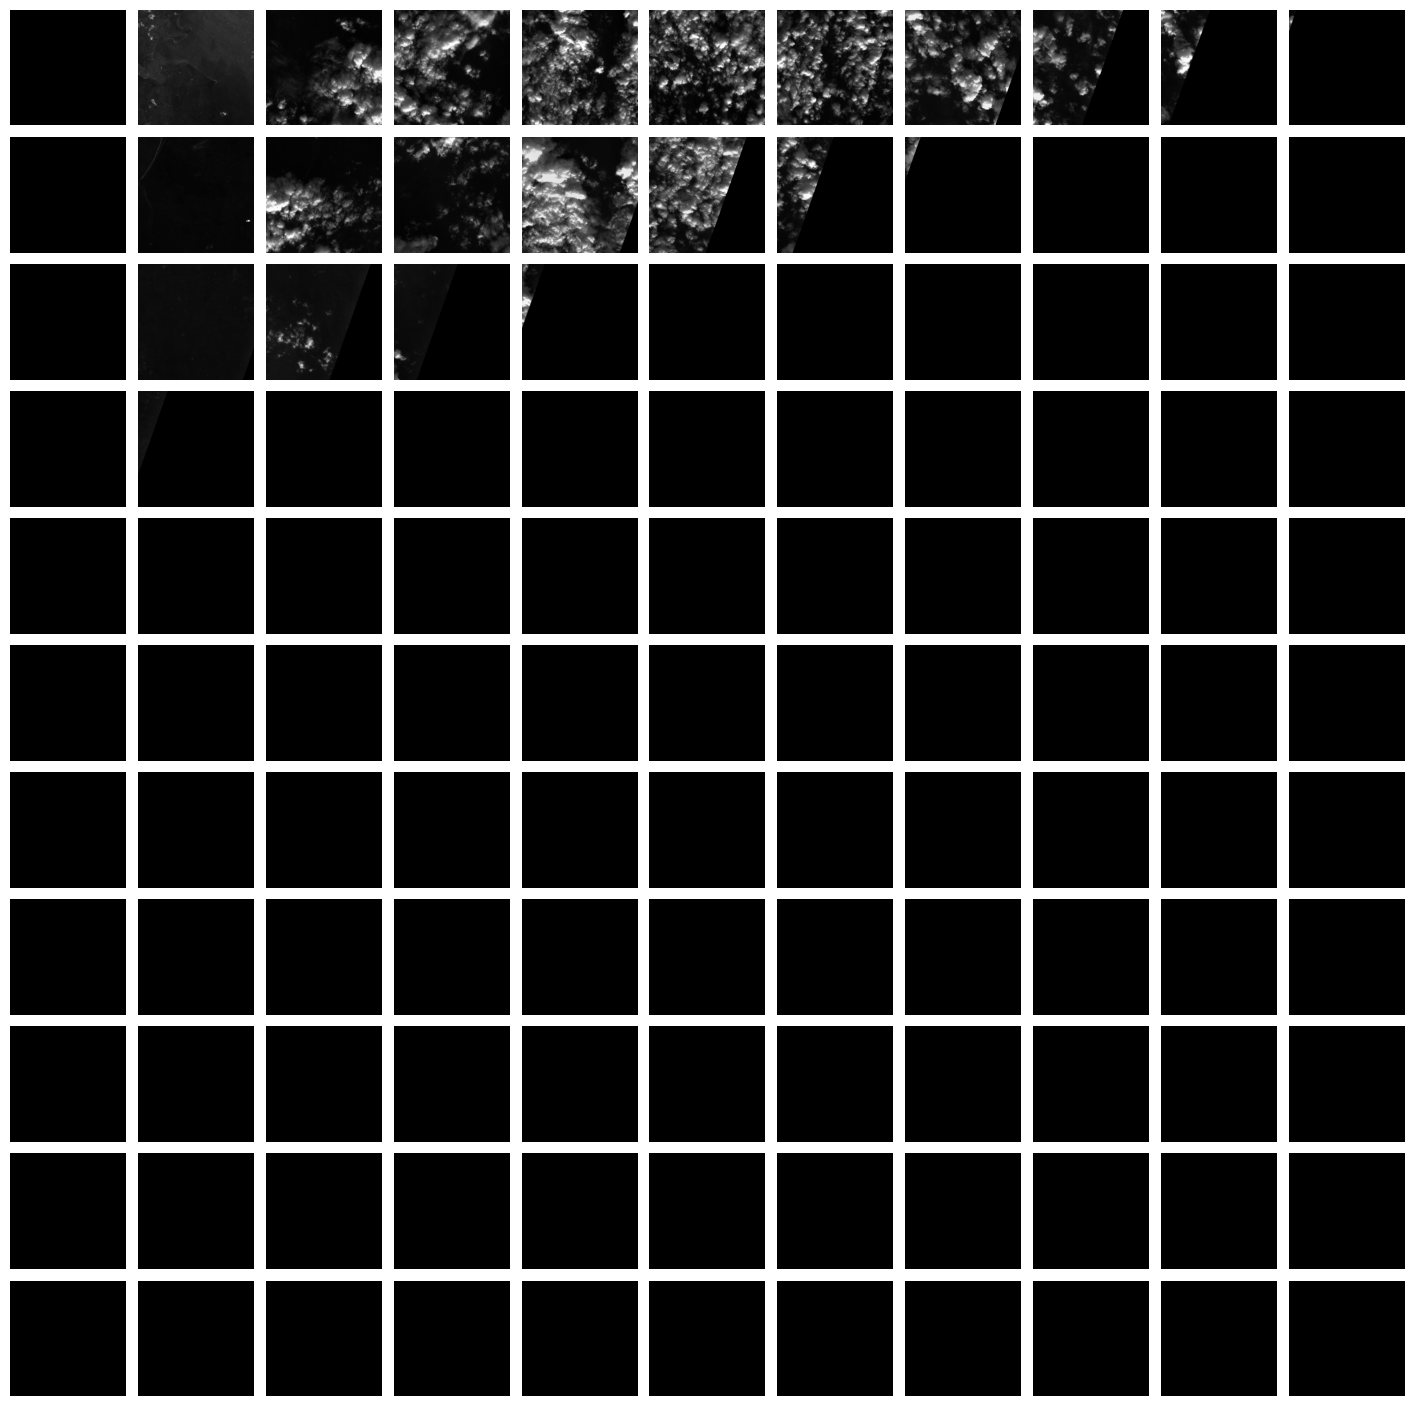

In [44]:
fig = plt.figure(figsize=(18, 18))
n_rows = 11
n_cols = 11

def sorting_key(string):
    split_string = string.split('_')
    return int(split_string[4])

image_paths = sorted(os.listdir("data/cropped/"), key=sorting_key)
for idx, image_path in enumerate(image_paths):
    image = gdal.Open(f"data/cropped/{image_path}")
    ax = fig.add_subplot(n_rows, n_cols, idx + 1)
    ax.imshow(image.ReadAsArray(), cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()